<a href="https://colab.research.google.com/github/minju2140/tensorflow/blob/main/2_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%2C_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%EC%99%80_Cross_Entropy%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## 샘플 데이터 생성

In [2]:
x = np.array([-50,-40,-35,-30,-25,-22, 10 ,25, 30, 45], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=np.float32)

## 케라스 모델 생성
자동 임의 weight 초기화  
$$sigmoid(wx+b) = \frac{1}{1 + e^{-(wx+b)}}$$

  모델 객체가 생성됨과 동시에 초기에는 임의의 값이 init_w, init_b에 저장된다.

In [15]:
# 모델 객체를 생성함과 동시에 w, b를 임의의 숫자로 초기화한다.
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1], activation='sigmoid') #activation function이 sigmoid
])
#결과가 위 정의했던 시그모이드 함수에 w,b값을 집어넣은 형태의 식으로 나타남.
init_w, init_b = model.get_weights()
print(init_w[0])
print(init_b)

[-0.4634155]
[0.]


#### 샘플 데이터 산점도와 모델이 생성될 때 만들어진 임의 시그모이드 함수를 시각화


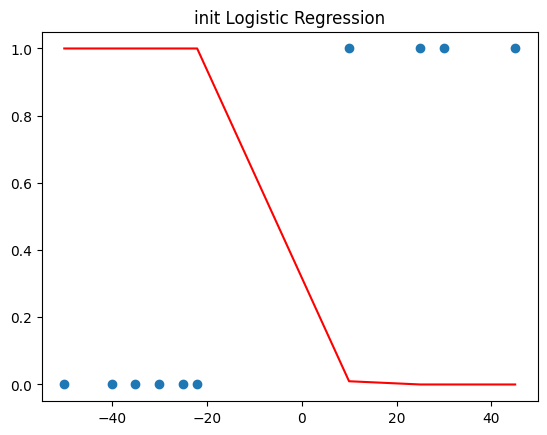

In [16]:
plt.scatter(x, y)

# k = np.linspace(-100, 100, 100)
z = 1 / (1 + np.exp(-(init_w[0] * x + init_b)))
plt.plot(x, z, color='red')
plt.title('init Logistic Regression')
plt.show()

### 만약, 데이터를 잘 표현할 수 있는 시그모이드 함수의 w, b를 찾고 싶다면..
배운대로, cross entropy를 비용함수로 설정하고 Gradient Decent를 사용하여 모델을 학습시킨 다음, 적합한 w, b를 찾아낼 수 있다.  

이진 분류인 경우 사용하는 cross entropy를 binary cross entropy라고 부른다.  
$$ BCE = -\frac{1}{N} \sum_{i=1}^{N} [y_{i} \log(\hat{y}{i}) + (1-y{i}) \log(1-\hat{y}_{i})] $$

In [17]:
# 모델 컴파일 과정
sgd = keras.optimizers.SGD(learning_rate=0.01) # 경사하강법 learnig rate를 0.1로 설정하고
model.compile(optimizer=sgd, loss='binary_crossentropy') # BCE를 비용함수로 설정

# 학습
history = model.fit(x, y, epochs=30)

# 학습된 w, b
w, b = model.get_weights()

print(f"\n\n\n학습된 w: {w}, b: {b}\n\n\n")

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 14.4595
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4.7576
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0290
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0272
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0257
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0244
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0233
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0223
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0214
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0206
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0198
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0191
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0185
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0179
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0174
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━

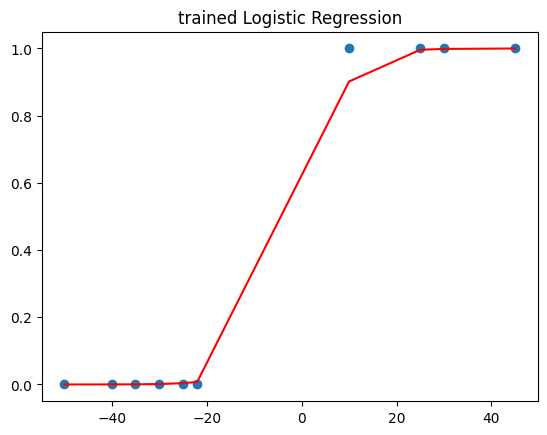

In [21]:
plt.scatter(x, y)

# k = np.linspace(-100, 100, 100)
z = 1 / (1 + np.exp(-(w[0] * x + b))) #e^x를 계산할 때 사용 하는 함수.

plt.plot(x, z, color='red')
plt.title('trained Logistic Regression')
plt.show()

## 모델을 활용해 새로운 데이터로 합격/불합격 확률을 예측

In [20]:
x_new = np.array(
    [-50,-10, 5, 10, 20],
    dtype=np.float32
)
#임의의 데이터 5개 입력.
y_new = np.round(model.predict(x_new), 3)
#np.round( ,3)=>소수점 3재짜리 까지 반올림
#model.predict함수로 예측.
print(y_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.   ]
 [0.098]
 [0.752]
 [0.902]
 [0.988]]
